# Sampling and Error Plots for IRIS dataset

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from IPython.display import display

%matplotlib inline

plt.rc("figure", figsize=(20,6))

In [2]:
IRIS = load_iris()

In [3]:
feat_names = IRIS.feature_names
feat_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_df = pd.DataFrame(IRIS.data, columns = feat_names)
iris_df["target"] = IRIS.target_names[IRIS.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# creating samples
samp = iris_df.sample(5)
samp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
67,5.8,2.7,4.1,1.0,versicolor
63,6.1,2.9,4.7,1.4,versicolor
2,4.7,3.2,1.3,0.2,setosa
73,6.1,2.8,4.7,1.2,versicolor
136,6.3,3.4,5.6,2.4,virginica


In [6]:
samp_melt = pd.melt(samp.select_dtypes(["float"]))
samp_melt.head()

,variable,value
0,sepal length (cm),5.8
1,sepal length (cm),6.1
2,sepal length (cm),4.7
3,sepal length (cm),6.1
4,sepal length (cm),6.3


In [7]:
#now let's use pd.melt on the iris data
iris_melt = pd.melt(iris_df.select_dtypes(["float"]))
iris_melt.head()

,variable,value
0,sepal length (cm),5.1
1,sepal length (cm),4.9
2,sepal length (cm),4.7
3,sepal length (cm),4.6
4,sepal length (cm),5.0


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


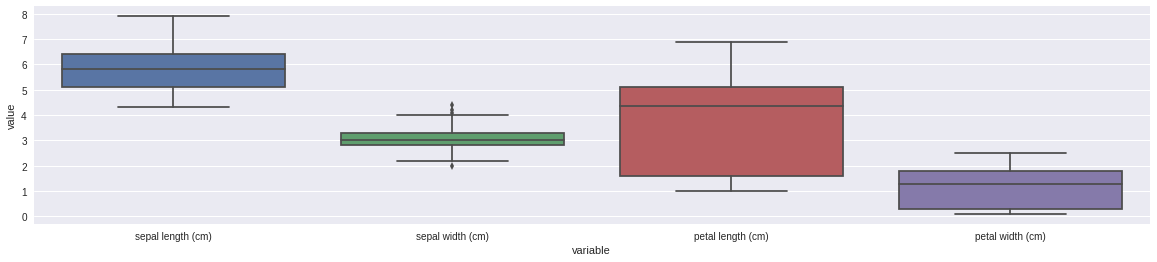

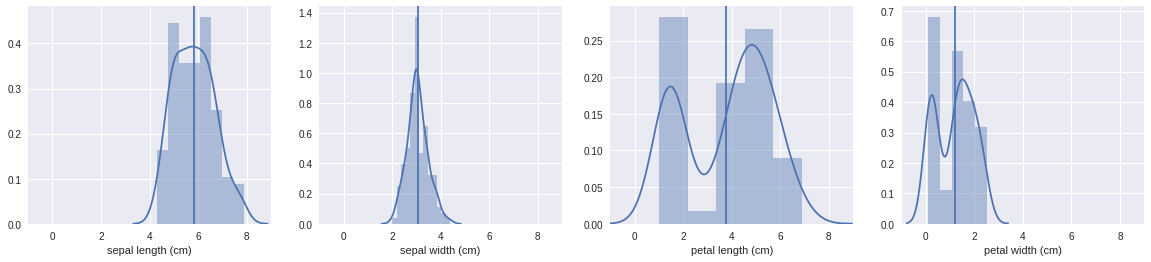

In [8]:
#plot box plots and distribution plot with seaborn
#1) Box plots
fig = plt.figure(figsize=(20,4))
sns.boxplot(iris_melt.variable, iris_melt.value)

#2) distribution plot in subsets form for each feature:

_, ax = plt.subplots(1,4,figsize=(20,4))

iris_df_numerical = iris_df.drop("target", axis=1)

for i, feat in enumerate(iris_df_numerical.columns):
    sns.distplot(iris_df_numerical[feat], ax=ax[i])
    ax[i].axvline(iris_df_numerical[feat].mean())
    ax[i].set_xlim(-1,9)

In [9]:
#Sampling the dataset:
np.random.seed=(42)

In [10]:
sample_1 = iris_df.sample(3)
display(sample_1.describe())
display(sample_1.describe().T)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,3.0,3.00,3.000000,3.000000
mean,5.3,3.20,2.233333,0.500000
std,0.2,0.70,1.357694,0.519615
min,5.1,2.40,1.400000,0.200000
25%,5.2,2.95,1.450000,0.200000
50%,5.3,3.50,1.500000,0.200000
75%,5.4,3.60,2.650000,0.650000
max,5.5,3.70,3.800000,1.100000


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),3.0,5.300000,0.200000,5.1,5.20,5.3,5.40,5.5
sepal width (cm),3.0,3.200000,0.700000,2.4,2.95,3.5,3.60,3.7
petal length (cm),3.0,2.233333,1.357694,1.4,1.45,1.5,2.65,3.8
petal width (cm),3.0,0.500000,0.519615,0.2,0.20,0.2,0.65,1.1


In [11]:
display(iris_df.describe())
display(iris_df.describe().T)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [12]:
sample_1_melt = pd.melt(sample_1.select_dtypes([float]))
sample_1_melt.head()

,variable,value
0,sepal length (cm),5.3
1,sepal length (cm),5.5
2,sepal length (cm),5.1
3,sepal width (cm),3.7
4,sepal width (cm),2.4


In [13]:
iris_melt.head()

,variable,value
0,sepal length (cm),5.1
1,sepal length (cm),4.9
2,sepal length (cm),4.7
3,sepal length (cm),4.6
4,sepal length (cm),5.0


Text(0.5,1,'Actual')

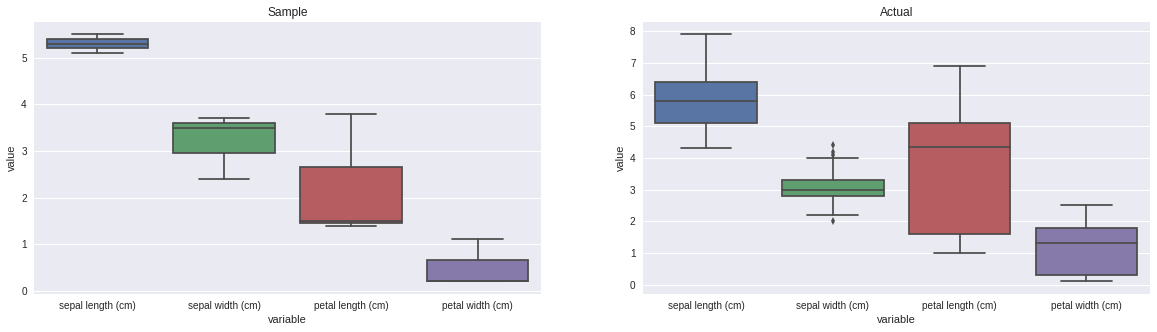

In [14]:
#Plot subplots using box plots of the actual data and the sample data

_, ax = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(sample_1_melt.variable, sample_1_melt.value, ax=ax[0])
ax[0].set_title("Sample")

sns.boxplot(iris_melt.variable, iris_melt.value, ax=ax[1])
ax[1].set_title("Actual")

Text(0.5,1,'Actual')

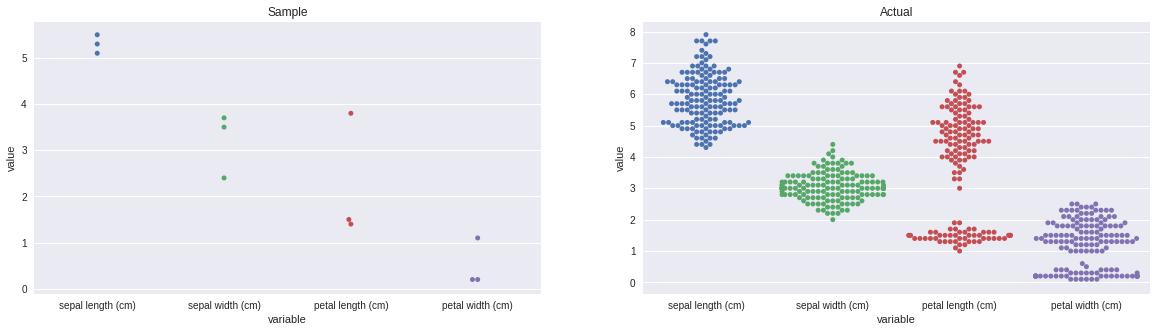

In [15]:
#Looking at different plots:
#Swarmplot - Probably not the best representation under these circumstances. 

_, ax = plt.subplots(1,2,figsize=(20,5))

sns.swarmplot(sample_1_melt.variable, sample_1_melt.value, ax=ax[0])
ax[0].set_title("Sample")

sns.swarmplot(iris_melt.variable, iris_melt.value, ax=ax[1])
ax[1].set_title("Actual")

Text(0.5,1,'Actual')

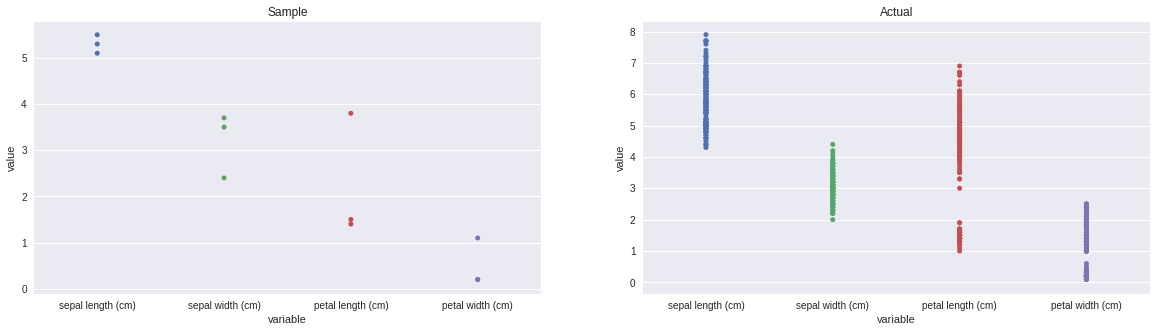

In [16]:
#stripplot

_, ax = plt.subplots(1,2,figsize=(20,5))

sns.stripplot(sample_1_melt.variable, sample_1_melt.value, ax=ax[0])
ax[0].set_title("Sample")

sns.stripplot(iris_melt.variable, iris_melt.value, ax=ax[1])
ax[1].set_title("Actual")

Text(0.5,1,'Actual')

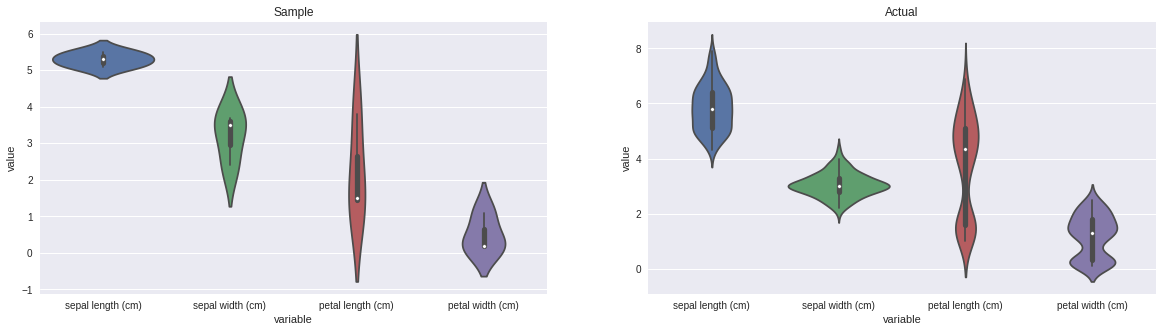

In [17]:
#violin plot

_, ax = plt.subplots(1,2,figsize=(20,5))

sns.violinplot(sample_1_melt.variable, sample_1_melt.value, ax=ax[0])
ax[0].set_title("Sample")

sns.violinplot(iris_melt.variable, iris_melt.value, ax=ax[1])
ax[1].set_title("Actual")

In [18]:
#Now let's calculate the error by its means. 
error_sample_1 = np.abs(iris_df.mean() - sample_1.mean())
error_sample_1
#Note that you will calculate the means for each feature. 

sepal length (cm)    0.543333
sepal width (cm)     0.146000
petal length (cm)    1.525333
petal width (cm)     0.698667
dtype: float64

In [19]:
#let's manually normalize this:
error_sample_1_nor = np.abs((iris_df.mean() - sample_1.mean()) / iris_df.mean())
error_sample_1_nor

sepal length (cm)    0.092983
sepal width (cm)     0.047806
petal length (cm)    0.405818
petal width (cm)     0.582870
dtype: float64

Text(0.5,1,'Actual')

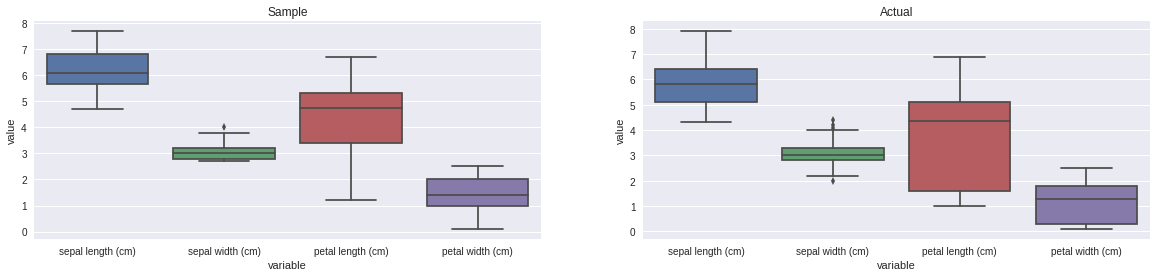

In [20]:
#Sample 2 with larget sample:

sample_2 = iris_df.sample(20)

sample_2_melt = pd.melt(sample_2.select_dtypes(["float"]))

_, ax = plt.subplots(1,2,figsize=(20,4))

sns.boxplot(sample_2_melt.variable, sample_2_melt.value, ax=ax[0])
ax[0].set_title("Sample")

sns.boxplot(iris_melt.variable, iris_melt.value, ax=ax[1])
ax[1]. set_title("Actual")

In [21]:
#Normalized sample to calculate error
error_sample_2_nor = np.abs((iris_df.mean() - sample_2.mean()) / iris_df.mean())
error_sample_2_nor

sepal length (cm)    0.061894
sepal width (cm)     0.018337
petal length (cm)    0.132050
petal width (cm)     0.134594
dtype: float64

In [22]:
display(error_sample_1_nor)
display(error_sample_2_nor)

sepal length (cm)    0.092983
sepal width (cm)     0.047806
petal length (cm)    0.405818
petal width (cm)     0.582870
dtype: float64

sepal length (cm)    0.061894
sepal width (cm)     0.018337
petal length (cm)    0.132050
petal width (cm)     0.134594
dtype: float64

In [23]:
#Plot the Error as a function of Sample Size for each feature:
#1) Create a function:

def feature_error_by_n(data, feature, n):
    sample = data[feature].sample(n)
    error = np.abs((data[feature].mean() - sample.mean()) / data[feature].mean())
    return error

In [24]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [25]:
iris_df_numerical.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
len(iris_df_numerical)

150

In [27]:
#Test to see if function wins. 
feature_error_by_n(iris_df, "sepal length (cm)", 3)

0.11580148317170581

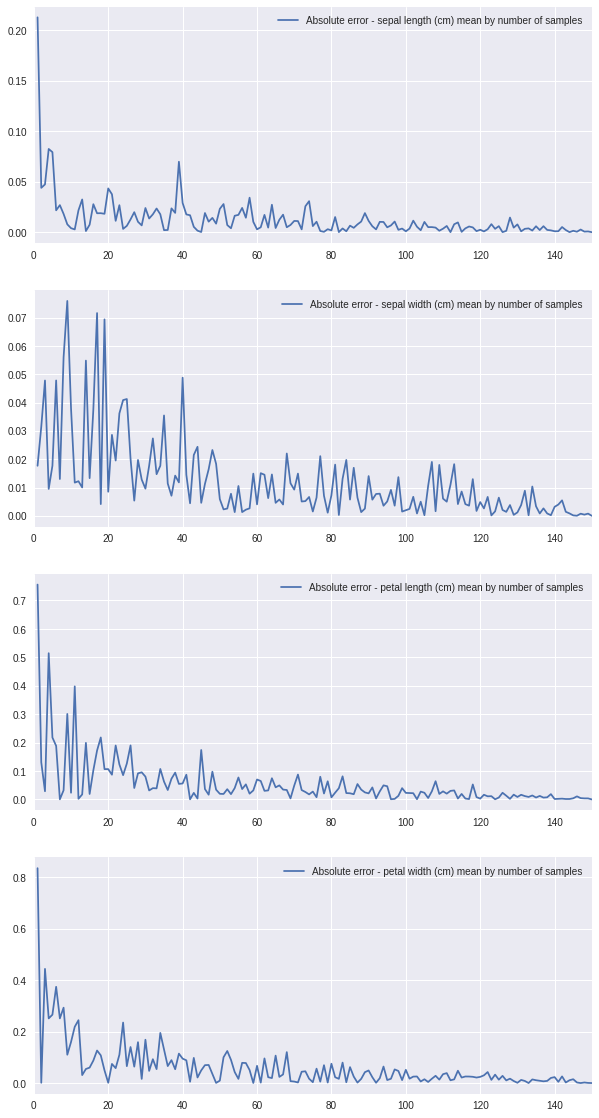

In [28]:
_, ax = plt.subplots(4,1, figsize=(10,20))

for i, feat in enumerate(iris_df_numerical.columns):
    #let's add in a number of samples using comprehension:
    feature_error = [feature_error_by_n(iris_df, feat, n) for n in range(1,151)]
    ax[i].plot(range(1,151), feature_error, label = "Absolute error - %s mean by number of samples" %feat)
    ax[i].set_xlim(0,150)
    ax[i].legend()

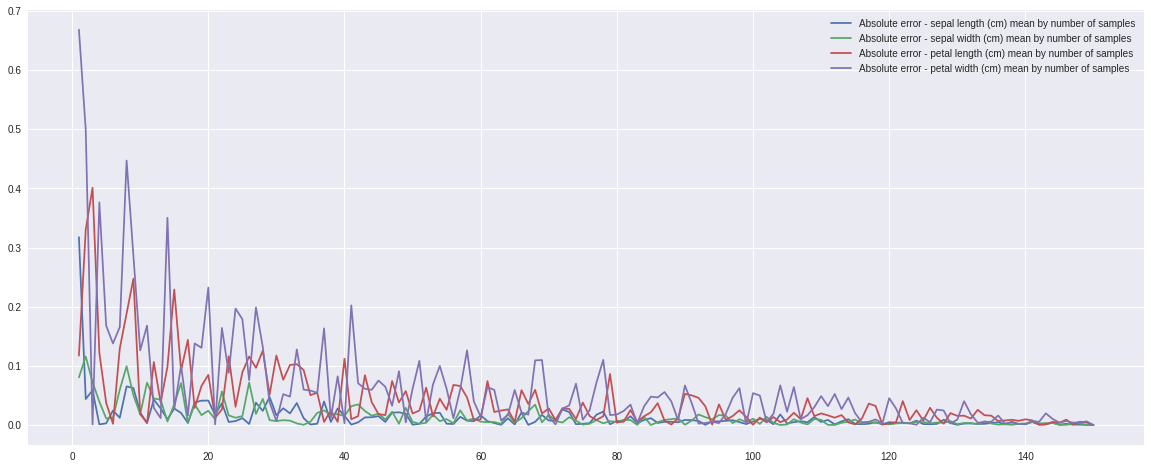

In [29]:
#you can see that all the errors would go down when the sample size increase:
#we can use another plot to add all these together and compare:

plt.figure(figsize=(20,8))

for i, feat in enumerate(iris_df_numerical.columns):
    #let's add in a number of samples using comprehension:
    feature_error = [feature_error_by_n(iris_df, feat, n) for n in range(1,151)]
    plt.plot(range(1,151), feature_error, label = "Absolute error - %s mean by number of samples" %feat)
    plt.legend()

# Calculating BIC for KMeans

In [30]:
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from time import time
from bic import BIC

In [31]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris_df_numerical.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
#Use functions to create model that will track time
#Note bic is calculate the data IRIS_df and the whole Kmeans.
#Note silhouette_score is calculating data IRIS_df and labels result of the Kmeans.
def fit_and_time(model, data):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {"fit_time": end, "model": model} #this will create a dataframe with 2 columns

def process_results(fit_and_time_results, data):
    df = pd.DataFrame(fit_and_time_results)
    df["k"] = df.model.apply(lambda x: x.n_clusters)
    df["bic"] = df.model.apply(lambda x: BIC(x, data))
    df["sil_sc"] = df.model.apply(lambda x: silhouette_score(data, x.labels_))
    df.set_index("k", inplace=True)
    return df

In [34]:
ks = range(2,50) #random select clusters

kmeans_models = []

df_data = iris_df_numerical #without the target column

for k in tqdm(ks):
    kmeans_models.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), df_data))
    
kmeans_models_df = process_results(kmeans_models, df_data)

100%|██████████| 48/48 [00:03<00:00, 13.61it/s]


In [35]:
kmeans_models_df.head()

,fit_time,model,bic,sil_sc
k,,,,
2,0.014117,"KMeans(algorithm='auto', copy_x=True, init='k-...",1125.356298,0.680814
3,0.018409,"KMeans(algorithm='auto', copy_x=True, init='k-...",884.835914,0.552592
4,0.023161,"KMeans(algorithm='auto', copy_x=True, init='k-...",802.633236,0.497826
5,0.026821,"KMeans(algorithm='auto', copy_x=True, init='k-...",747.407940,0.488518
6,0.026500,"KMeans(algorithm='auto', copy_x=True, init='k-...",734.551362,0.368206


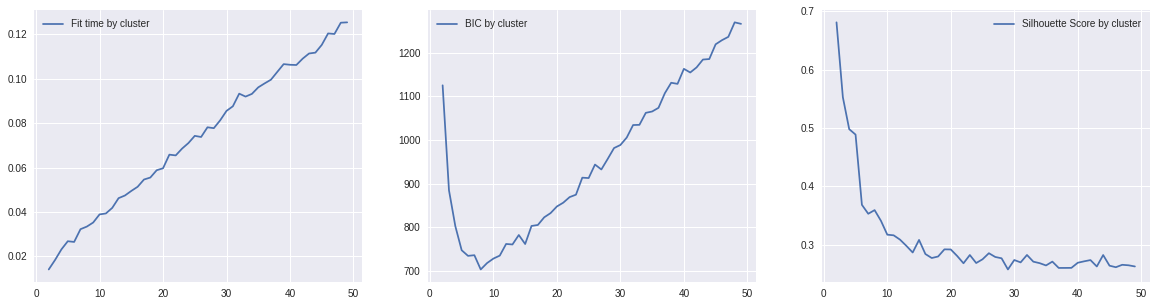

In [36]:
#Find the optimal amount clusters by using the eblow curve. Need to graph it out:
_, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(kmeans_models_df.index, kmeans_models_df.fit_time, label = "Fit time by cluster")
ax[0].legend()
ax[1].plot(kmeans_models_df.index, kmeans_models_df.bic, label = "BIC by cluster")
ax[1].legend()
ax[2].plot(kmeans_models_df.index, kmeans_models_df.sil_sc, label = "Silhouette Score by cluster")
ax[2].legend()

In [37]:
#Normalized data:
df_data_sc = ((df_data - df_data.mean()) / (df_data.std()))
df_data_sc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


In [38]:
#Recalculate using normalized data
ks = range(2,50) #random select clusters

kmeans_models_sc = []

df_data_sc

for k in tqdm(ks):
    kmeans_models_sc.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), df_data_sc))
    
kmeans_models_df_sc = process_results(kmeans_models_sc, df_data_sc)

100%|██████████| 48/48 [00:03<00:00, 13.66it/s]


In [39]:
kmeans_models_df_sc.head()

,fit_time,model,bic,sil_sc
k,,,,
2,0.012758,"KMeans(algorithm='auto', copy_x=True, init='k-...",1347.938829,0.580184
3,0.018754,"KMeans(algorithm='auto', copy_x=True, init='k-...",1234.170133,0.458972
4,0.022525,"KMeans(algorithm='auto', copy_x=True, init='k-...",1204.940005,0.385485
5,0.028215,"KMeans(algorithm='auto', copy_x=True, init='k-...",1164.370359,0.348052
6,0.029624,"KMeans(algorithm='auto', copy_x=True, init='k-...",1146.866035,0.348767


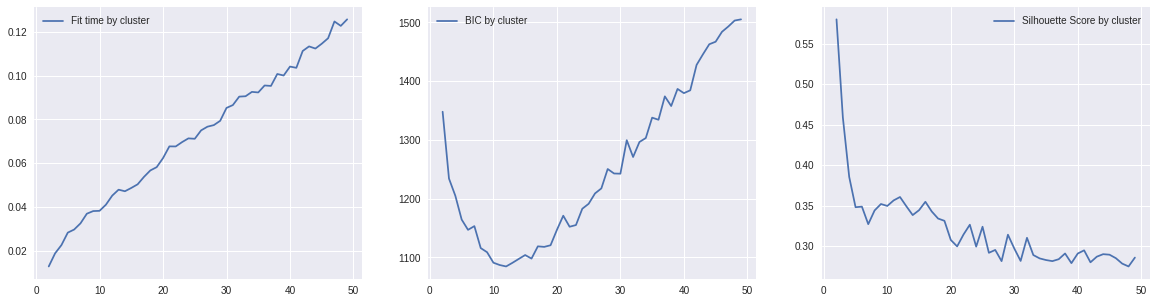

In [40]:
_, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(kmeans_models_df_sc.index, kmeans_models_df_sc.fit_time, label = "Fit time by cluster")
ax[0].legend()
ax[1].plot(kmeans_models_df_sc.index, kmeans_models_df_sc.bic, label = "BIC by cluster")
ax[1].legend()
ax[2].plot(kmeans_models_df_sc.index, kmeans_models_df_sc.sil_sc, label = "Silhouette Score by cluster")
ax[2].legend()

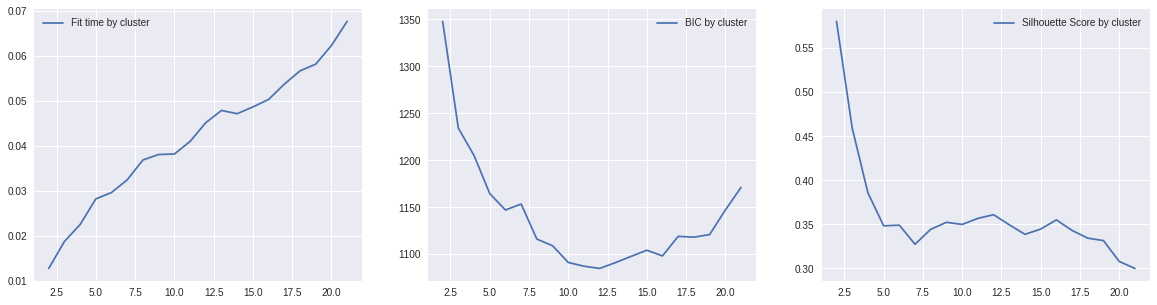

In [41]:
#Use a sample of 20:

_, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(kmeans_models_df_sc.index[:20], kmeans_models_df_sc.fit_time[:20], label = "Fit time by cluster")
ax[0].legend()
ax[1].plot(kmeans_models_df_sc.index[:20], kmeans_models_df_sc.bic[:20], label = "BIC by cluster")
ax[1].legend()
ax[2].plot(kmeans_models_df_sc.index[:20], kmeans_models_df_sc.sil_sc[:20], label = "Silhouette Score by cluster")
ax[2].legend()

In [42]:
#look at the graphs through PCA - 2 dimensions.
iris_df_1 = iris_df

In [43]:
iris_df_1 = iris_df_1.drop("target", axis=1)

In [44]:
iris_df_1["label"] = IRIS.target
iris_df_1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
kmeans_2 = kmeans_models_df_sc.model.values[0]
kmeans_3 = kmeans_models_df_sc.model.values[1]
kmeans_4 = kmeans_models_df_sc.model.values[2]
kmeans_5 = kmeans_models_df_sc.model.values[3]

Text(0.5,1,'5 clusters')

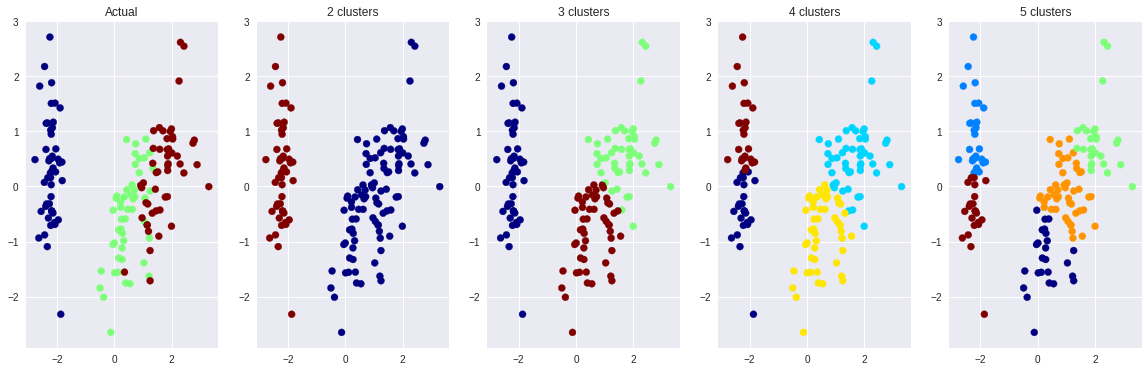

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_of_dim = 2
pca = PCA(num_of_dim)

_, ax = plt.subplots(1,5, figsize=(20,6))
iris_2d = pca.fit_transform(df_data_sc)
ax[0].scatter(iris_2d[:,0], iris_2d[:,1], c=iris_df_1.label, cmap=plt.cm.jet)
ax[0].set_title("Actual")
ax[1].scatter(iris_2d[:,0], iris_2d[:,1], c=kmeans_2.labels_, cmap=plt.cm.jet)
ax[1].set_title("2 clusters")
ax[2].scatter(iris_2d[:,0], iris_2d[:,1], c=kmeans_3.labels_, cmap=plt.cm.jet)
ax[2].set_title("3 clusters")
ax[3].scatter(iris_2d[:,0], iris_2d[:,1], c=kmeans_4.labels_, cmap=plt.cm.jet)
ax[3].set_title("4 clusters")
ax[4].scatter(iris_2d[:,0], iris_2d[:,1], c=kmeans_5.labels_, cmap=plt.cm.jet)
ax[4].set_title("5 clusters")